The purpose of this notebook is to demonstrate how to refine with locally defined GSAS-II functions.



# Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys

sys.path += ["../../../easyXRD"]


import easyxrd
from easyxrd.core import exrd

import xarray as xr
import numpy as np
import pybaselines
from copy import deepcopy



Checking required packages:

---scipy package with version 1.14.0 is available and imported 
---xarray package with version 2024.7.0 is available and imported 
---numpy package with version 1.26.4 is available and imported 
---pymatgen package with version 2024.7.18 is available and imported 
---pyFAI package with version 2024.5.0 is available and imported 
---ipympl package with version 0.9.4 is available and imported 
---fabio package with version 2024.4.0 is available and imported 
---mp_api package with version 0.41.2 is available and imported 
---pandas package with version 2.2.2 is available and imported 


Imported easyxrd with following configuration:



In [3]:
# importing matplotlib for plots.
%matplotlib widget
import matplotlib.pyplot as plt

plt.rcParams.update({"figure.max_open_warning": 0})
plt.rcParams["figure.constrained_layout.use"] = True

CPU times: user 273 ms, sys: 25.1 ms, total: 298 ms
Wall time: 295 ms


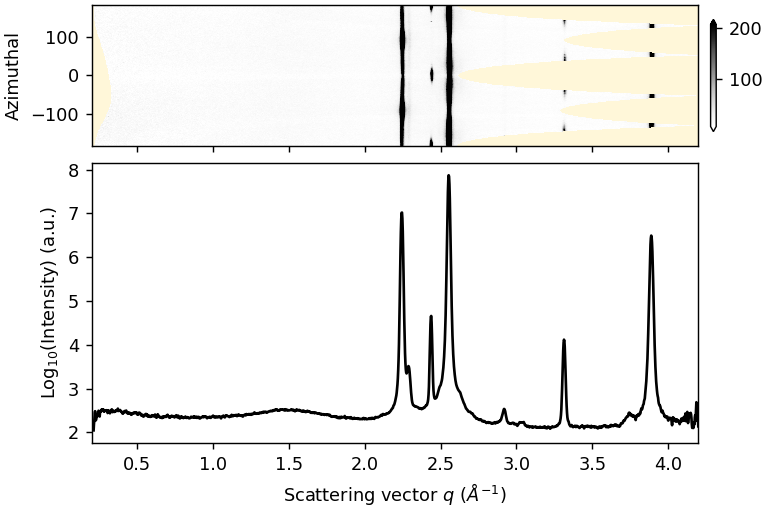

In [4]:
%%time

import pyFAI, fabio

ai_file = "tiff_files/_calibration.poni"
mask_file = "tiff_files/_mask.edf"
ai = pyFAI.load(ai_file)
mask = fabio.open(mask_file).data


sample_Blank = exrd()
# with xr.open_dataset('nc_files/Blank.nc') as ds:
#     img = (ds.dexela_img.astype('float32') - ds.dexela_img_dark.astype('float32')).values
#     tifffile.imwrite('tiff_files/Blank.tiff',img)
# sample_Blank.load_xrd_data(from_tiff_file='tiff_files/Blank.tiff',
#                             ai = ai,
#                             mask = mask,
#                             radial_range=(0.2,4.2),
#                             plot=True
#                             )
# sample_Blank.export_ds(save_dir='nc_files',save_name='Blank.nc')
sample_Blank.load_xrd_data(from_nc_file="nc_files/Blank.nc", plot=False)


sample_LaB6 = exrd()
# with xr.open_dataset('nc_files/LaB6.nc') as ds:
#     img = (ds.dexela_imgs.mean(dim='mBaseX').astype('float32') - ds.dexela_img_dark.astype('float32')).values
#     tifffile.imwrite('tiff_files/LaB6.tiff',img)
# sample_LaB6.load_xrd_data(from_tiff_file='tiff_files/LaB6.tiff',
#                             ai = ai,
#                             mask = mask,
#                             radial_range=(0.2,4.2),
#                             plot=True
#                             )
# sample_LaB6.export_ds(save_dir='nc_files',save_name='LaB6.nc')
sample_LaB6.load_xrd_data(from_nc_file="nc_files/LaB6.nc", plot=False)

sample_Pt = exrd()
# # with xr.open_dataset('nc_files/Pt.nc') as ds:
# #     img = (ds.dexela_img.astype('float32') - ds.dexela_img_dark.astype('float32')).values
# #     tifffile.imwrite('tiff_files/Pt.tiff',img)
# sample_Pt.load_xrd_data(from_tiff_file='tiff_files/Pt.tiff',
#                             ai = ai,
#                             mask = mask,
#                             radial_range=(0.2,4.2),
#                             plot=True
#                             )
# sample_Pt.export_ds(save_dir='nc_files',save_name='Pt.nc')
sample_Pt.load_xrd_data(from_nc_file="nc_files/Pt.nc", plot=False)

sample_DAHL = exrd()
# # with xr.open_dataset('nc_files/DAHL.nc') as ds:
# #     img = (ds.dexela_img.astype('float32') - ds.dexela_img_dark.astype('float32')).values
# #     tifffile.imwrite('tiff_files/DAHL.tiff',img)
# sample_DAHL.load_xrd_data(from_tiff_file='tiff_files/DAHL.tiff',
#                             ai = ai,
#                             mask = mask,
#                             radial_range=(0.2,4.2),
#                             plot=True
#                             )
# sample_DAHL.export_ds(save_dir='nc_files',save_name='DAHL.nc')
sample_DAHL.load_xrd_data(from_nc_file="nc_files/DAHL.nc", plot=False)

sample_Dogbone = exrd(verbose=False)
# with xr.open_dataset('nc_files/Dogbone.nc') as ds:
#     img = (ds.dexela_img.astype('float32') - ds.dexela_img_dark.astype('float32')).values
#     tifffile.imwrite('tiff_files/Dogbone.tiff',img)
# sample_Dogbone.load_xrd_data(from_tiff_file='tiff_files/Dogbone.tiff',
#                             ai = ai,
#                             mask = mask,
#                             radial_range=(0.2,4.2),
#                             plot=True
#                             )
# sample_Dogbone.export_ds(save_dir='nc_files',save_name='Dogbone.nc')
sample_Dogbone.load_xrd_data(from_nc_file="nc_files/Dogbone.nc", plot=True)

phases_LaB6 = [
    {
        "mp_id": "none",
        "cif": "_cifs/LaB6_a=4.1568_NIST_value.cif",
        "label": "LaB6",
        "scale": 1.005,
        "scale_a": 1,
        "scale_b": 1,
        "scale_c": 1,
    },
]

phases_Pt = [
    {
        "mp_id": "none",
        "cif": "_cifs/Pt_a=3.9231.cif",
        "label": "Pt",
        "scale": 1,
        "scale_a": 1,
        "scale_b": 1,
        "scale_c": 1,
    },
]


phases_Zr = [
    {
        "mp_id": "none",
        "cif": "_cifs/Zr_a=3.2320_c=5.147.cif",
        "label": "Zr",
        "scale": 1,
        "scale_a": 1,
        "scale_b": 1,
        "scale_c": 1,
    },
]

phases_PtZrZrH = [
    {
        "mp_id": "none",
        "cif": "_cifs/ZrH1.66_a=4.7839.cif",
        "label": "ZrH",
        "scale": 0.993,
        "scale_a": 1,
        "scale_b": 1,
        "scale_c": 1,
    },
    {
        "mp_id": "none",
        "cif": "_cifs/Zr_a=3.2320_c=5.147.cif",
        "label": "Zr",
        "scale": 1,
        "scale_a": 1,
        "scale_b": 1,
        "scale_c": 1,
    },
    {
        "mp_id": "none",
        "cif": "_cifs/Pt_a=3.9231.cif",
        "label": "Pt",
        "scale": 1,
        "scale_a": 1,
        "scale_b": 1,
        "scale_c": 1,
    },
]

phases_ZrZrH = [
    {
        "mp_id": "none",
        "cif": "_cifs/ZrH1.66_a=4.7839.cif",
        "label": "ZrH",
        "scale": 0.993,
        "scale_a": 1,
        "scale_b": 1,
        "scale_c": 1,
    },
    {
        "mp_id": "none",
        "cif": "_cifs/Zr_a=3.2320_c=5.147.cif",
        "label": "Zr",
        "scale": 1,
        "scale_a": 1,
        "scale_b": 1,
        "scale_c": 1,
    },
]

phases_PtZr = [
    {
        "mp_id": "none",
        "cif": "_cifs/Pt_a=3.9231.cif",
        "label": "Pt",
        "scale": 1,
        "scale_a": 1,
        "scale_b": 1,
        "scale_c": 1,
    },
    {
        "mp_id": "none",
        "cif": "_cifs/Zr_a=3.2320_c=5.147.cif",
        "label": "Zr",
        "scale": 1,
        "scale_a": 1,
        "scale_b": 1,
        "scale_c": 1,
    },
]

# LaB6

GSAS-II binary directory: /home/mt/G2/GSAS-II/GSASII-bin/linux_64_p3.11_n1.26
7 values read from config file /home/mt/g2full/GSAS-II/GSASII/config.py

Rwp from 1st refinement is = 96.734 
 
Background is refined. Rwp is now 52.074 (was 96.734)
Cell parameters of all phases are refined. Rwp is now 6.725 (was 52.074)
Strain broadening of all phases are refined. Rwp is now 5.594 (was 6.725)
Size broadening of all phases are refined. Rwp is now 5.594 (was 5.594)
Background is refined. Rwp is now 3.804 (was 5.594)
Cell parameters of all phases are refined. Rwp is now 3.794 (was 3.804)
After setting LeBail refinement to False, Rwp is now 4.246 (was 3.794)
Phase fractions of all phases are refined. Rwp is now 4.246 (was 4.246)
Preferred orientation for LaB6 phase is refined. Rwp is now 4.017 (was 4.246)
Background is refined. Rwp is now 4.013 (was 4.017)
CPU times: user 1.76 s, sys: 83.8 ms, total: 1.84 s
Wall time: 2 s


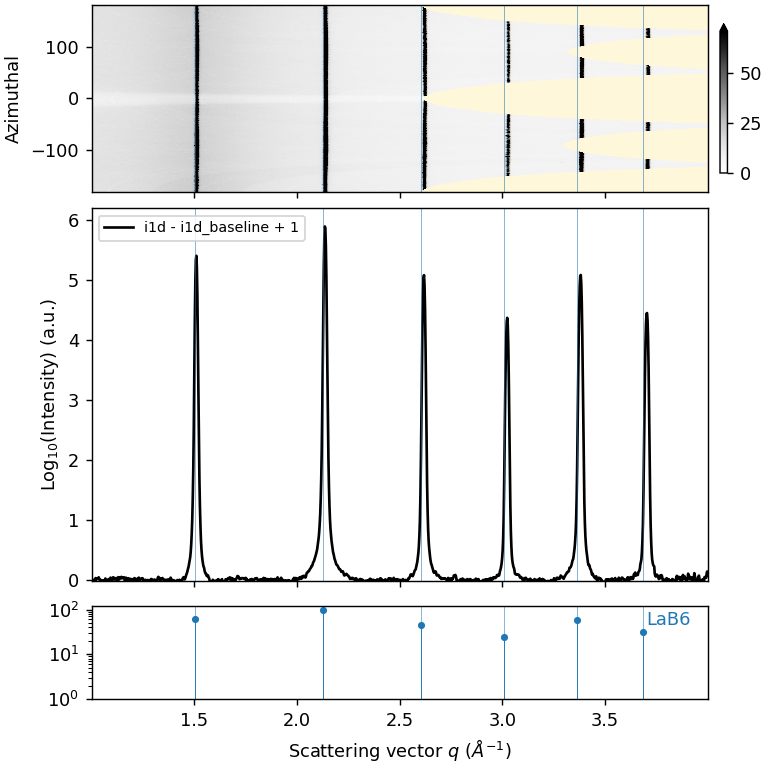

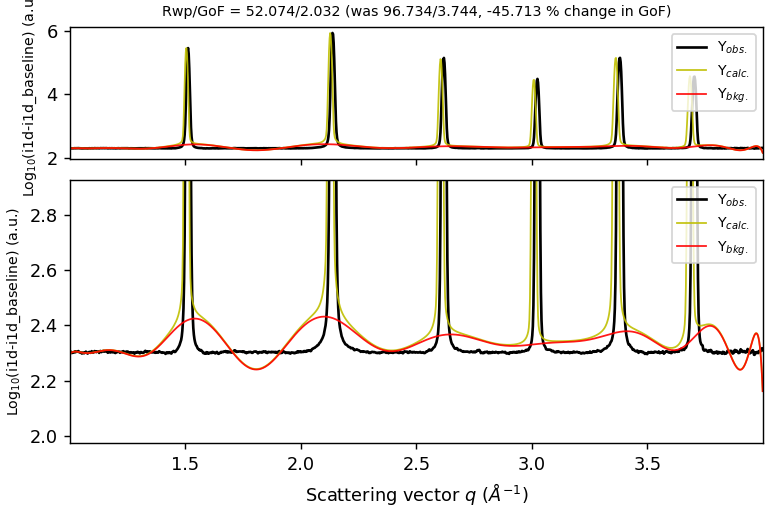

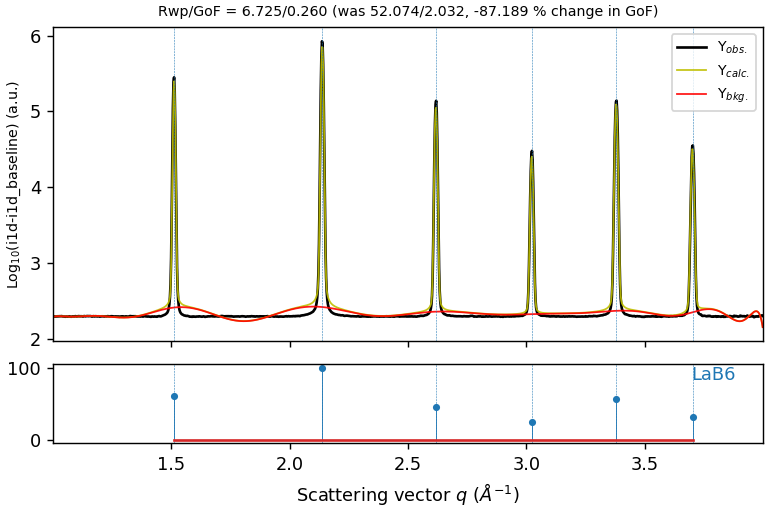

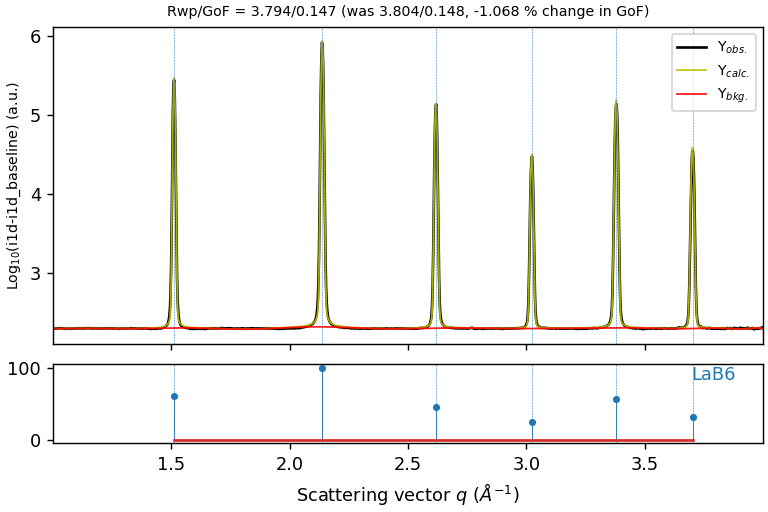

In [5]:
%%time

sample = deepcopy(sample_LaB6)

sample.get_baseline(
    input_bkg=sample_Blank,
    arpls_lam=1e5,
    use_arpls=True,
    get_i2d_baseline = False,
    use_i2d_baseline = True,
    roi_radial_range=[1, 4],
    # roi_azimuthal_range=(20,50),
    normalize=False,
    spotty_data_correction=False,
    spotty_data_correction_threshold=2,
    plot=False,
)



sample.load_phases(phases=phases_LaB6, plot=True)

sample.setup_gsas2_calculator(instprm_from_gpx="gsas_instprms.gpx")
sample.refine_background(num_coeffs=20,plot=True)
sample.refine_cell_params(plot=True)
sample.refine_strain_broadening()
sample.refine_size_broadening()
sample.refine_background(num_coeffs=20)
sample.refine_cell_params(plot=True)

sample.set_LeBail(set_to=False, refine=True)
sample.refine_phase_fractions()
sample.refine_preferred_orientation(phase=0, harmonics_order=4)
sample.refine_background(num_coeffs=20)
# sample.plot_refinement(ylogscale=True)

# Pt


Rwp from 1st refinement is = 21.302 
 
Cell parameters of all phases are refined. Rwp is now 11.661 (was 21.302)
Strain broadening of all phases are refined. Rwp is now 5.548 (was 11.661)
Size broadening of all phases are refined. Rwp is now 5.395 (was 5.548)
Background is refined. Rwp is now 3.996 (was 5.395)
After setting LeBail refinement to False, Rwp is now 15.012 (was 3.996)
Phase fractions of all phases are refined. Rwp is now 15.012 (was 15.012)
Preferred orientation for Pt phase is refined. Rwp is now 3.986 (was 15.012)
Background is refined. Rwp is now 3.985 (was 3.986)
Cell parameters of all phases are refined. Rwp is now 3.817 (was 3.985)
CPU times: user 994 ms, sys: 33 ms, total: 1.03 s
Wall time: 1.19 s


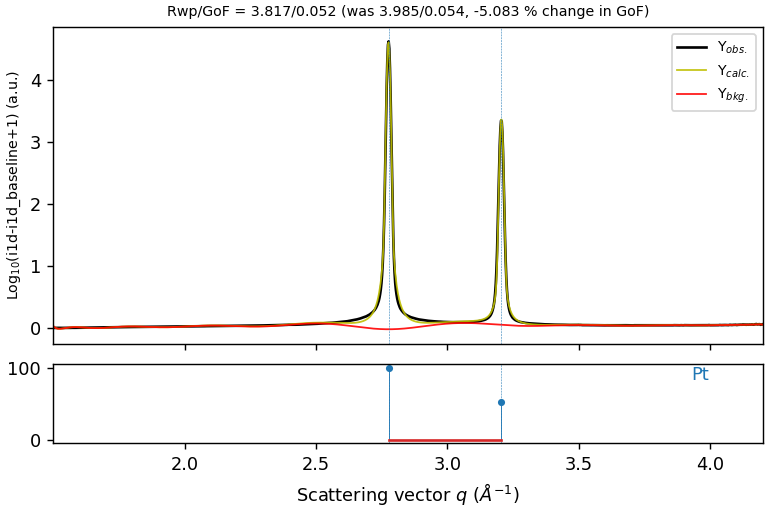

In [6]:
%%time

sample = deepcopy(sample_Pt)
sample.get_baseline(
    input_bkg=sample_Blank,
    arpls_lam=1e5,
    use_arpls=False,
    roi_radial_range=[1.5, 4.2],
    plot=False,
)
sample.load_phases(phases=phases_Pt, plot=False)

sample.setup_gsas2_calculator(instprm_from_gpx="gsas_LaB6.gpx")
sample.refine_cell_params()
sample.refine_strain_broadening()
sample.refine_size_broadening()
sample.refine_background(num_coeffs=20)
# sample.plot_refinement()

sample.set_LeBail(set_to=False, refine=True)
sample.refine_phase_fractions()
sample.refine_preferred_orientation(phase=0, harmonics_order=4)
sample.refine_background(num_coeffs=20)
# sample.plot_refinement(ylogscale=True)
sample.refine_cell_params(plot=True)

# DAHL


Rwp from 1st refinement is = 36.366 
 
Cell parameters of all phases are refined. Rwp is now 34.197 (was 36.366)
Strain broadening of all phases are refined. Rwp is now 11.668 (was 34.197)
Size broadening of all phases are refined. Rwp is now 11.642 (was 11.668)
Background is refined. Rwp is now 10.931 (was 11.642)
Cell parameters of all phases are refined. Rwp is now 7.014 (was 10.931)
After setting LeBail refinement to False, Rwp is now 59.716 (was 7.014)
Phase fractions of all phases are refined. Rwp is now 33.301 (was 59.716)
Preferred orientation for Pt phase is refined. Rwp is now 24.135 (was 33.301)
Preferred orientation for Zr phase is refined. Rwp is now 9.653 (was 24.135)
Background is refined. Rwp is now 9.210 (was 9.653)
Background is refined. Rwp is now 9.210 (was 9.210)
Cell parameters of all phases are refined. Rwp is now 9.207 (was 9.210)
CPU times: user 1.6 s, sys: 32.5 ms, total: 1.64 s
Wall time: 1.8 s


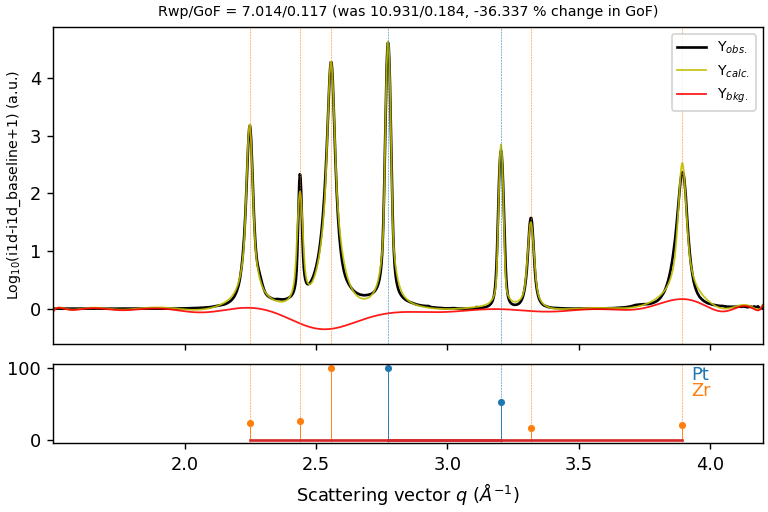

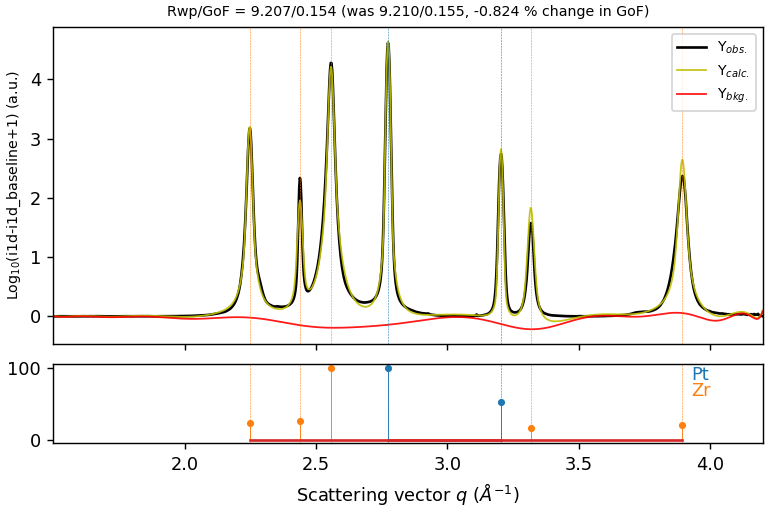

In [7]:
%%time

sample = deepcopy(sample_DAHL)
sample.get_baseline(
    input_bkg=sample_Blank,
    arpls_lam=1e5,
    use_arpls=True,
    roi_radial_range=[1.5, 4.2],
    normalize_to=100,
    plot=False,
)
sample.load_phases(phases=phases_PtZr, plot=False)


sample.setup_gsas2_calculator(instprm_from_gpx="gsas_LaB6.gpx")
sample.refine_cell_params()
sample.refine_strain_broadening()
sample.refine_size_broadening()
sample.refine_background(num_coeffs=20)
sample.refine_cell_params(plot=True)

sample.set_LeBail(set_to=False, refine=True)
sample.refine_phase_fractions()

sample.refine_preferred_orientation(phase=0, harmonics_order=4)
sample.refine_preferred_orientation(phase=1, harmonics_order=4)
sample.refine_background(num_coeffs=20)
sample.refine_background(num_coeffs=20)
sample.refine_cell_params(plot=True)

# Dogbone


Rwp from 1st refinement is = 21.428 
 
Cell parameters of all phases are refined. Rwp is now 20.272 (was 21.428)
Strain broadening of all phases are refined. Rwp is now 6.680 (was 20.272)
Size broadening of all phases are refined. Rwp is now 6.663 (was 6.680)
Background is refined. Rwp is now 5.535 (was 6.663)
Cell parameters of all phases are refined. Rwp is now 5.029 (was 5.535)
After setting LeBail refinement to False, Rwp is now 70.625 (was 5.029)
Phase fractions of all phases are refined. Rwp is now 49.642 (was 70.625)
Preferred orientation for Zr phase is refined. Rwp is now 7.159 (was 49.642)
Background is refined. Rwp is now 7.015 (was 7.159)
Cell parameters of all phases are refined. Rwp is now 7.005 (was 7.015)
CPU times: user 1.84 s, sys: 28.1 ms, total: 1.86 s
Wall time: 2.04 s


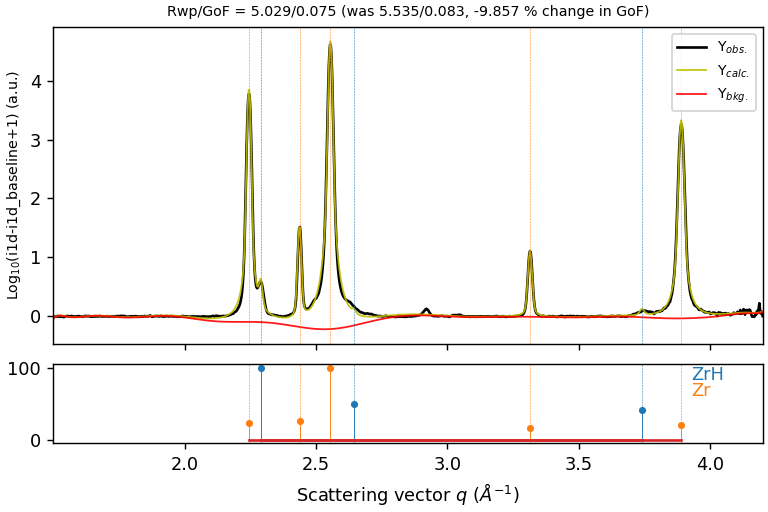

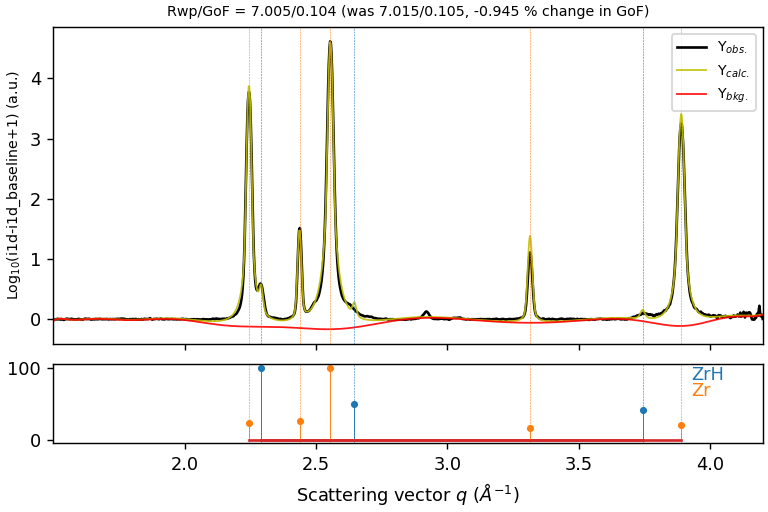

In [8]:
%%time

sample = deepcopy(sample_Dogbone)
sample.get_baseline(
    input_bkg=sample_Blank,
    arpls_lam=1e5,
    use_arpls=True,
    roi_radial_range=[1.5, 4.2],
    normalize_to=100,
    plot=False,
)
sample.load_phases(phases=phases_ZrZrH, plot=False)


sample.setup_gsas2_calculator(instprm_from_gpx="gsas_LaB6.gpx")
sample.refine_cell_params()
sample.refine_strain_broadening()
sample.refine_size_broadening()
sample.refine_background(num_coeffs=20)
sample.refine_cell_params(plot=True)

sample.set_LeBail(set_to=False, refine=True)
sample.refine_phase_fractions()
sample.refine_preferred_orientation(phase=1, harmonics_order=4)
sample.refine_background(num_coeffs=20)
sample.refine_cell_params(plot=True)